## Projectile motion

The equations that govern the motion of a projectile considering air friction (quadratic drag force model) are:

\begin{equation*}
m \ddot{x} = - \beta \sqrt{\dot{x} ^2 + \dot{y} ^2} \,\, \dot{x}
\end{equation*}

\begin{equation*}
m \ddot{y} = - mg - \beta \sqrt{\dot{x} ^2 + \dot{y} ^2} \,\, \dot{y}
\end{equation*}

We can rewrite the same equations as a system of first-order differential equations:

\begin{equation*}
m \dot{v_x} = - \beta \sqrt{v_x ^2 + v_y ^2} \,\, v_x
\end{equation*}

\begin{equation*}
m \dot{v_y} = - mg - \beta \sqrt{v_x ^2 + v_y ^2} \,\, v_y
\end{equation*}

\begin{equation*}
v_x = \dot{x}
\end{equation*}

\begin{equation*}
v_y = \dot{y}
\end{equation*}

In this form, we can solve the problem directly using the **solve_ivp()** method.



In [519]:
# Importing libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

plt.style.use("classic")

In [520]:
class Projectile:

	__g = 9.81

	# Defining the constructor
	def __init__(self, h, m, beta, v0, theta):
		self.h = h
		self.m = m
		self.beta = beta
		self.v0 = v0
		self.theta = np.radians(theta)
	
	# Defining the system
	def __dSdt(self, t, S):
		x, vx, y, vy = S
		return [vx, - self.beta / self.m * np.sqrt(vx ** 2 + vy ** 2) * vx, vy, - Projectile.__g - (self.beta / self.m * np.sqrt(vx ** 2 + vy ** 2) * vy)]
	
	# Defining the full solving method
	def solve(self):
		initial_conditions = [0, self.v0 * np.cos(self.theta), self.h, self.v0 * np.sin(self.theta)]
		time = 1.0

		while (time < 500):
			t = np.linspace(0, time, 1000)
			solution = solve_ivp(self.__dSdt, t_span= (0, time), y0= initial_conditions, t_eval= t, method= "DOP853")

			if np.any(solution.y[2] < 0):
				break
			else:
				time += 0.01
		
		# Solutions
		x = solution.y[0]
		vx = solution.y[1]
		y = solution.y[2]
		vy = solution.y[3]

		# Measurments
		range = round(float(max(x)), ndigits= 1)
		height = round(float(max(y)), ndigits= 1)
		time = round(time, ndigits= 2)
		travel_distance = round(float(np.trapezoid(np.sqrt(vx ** 2 + vy ** 2), t)), ndigits= 1)

		# Output
		print(f"Range: {range} m")
		print(f"Maximum height: {height} m")
		print(f"Flight time: {time} s")
		print(f"Total distance: {travel_distance} m")
		print("\n")

		# Plotting the graph
		plt.figure()
		plt.plot(x, y, label= "Position", color= "black")
		plt.ylim((self.h, height + 10))
		plt.xlim((0, range + 10))
		plt.title("Trajectory Simulation", color= "blue", fontweight= "bold", fontsize= 16)
		plt.xlabel("X [m]", color= "blue", fontweight= "bold", fontsize= 12)
		plt.ylabel("Y [m]", color= "blue", fontweight= "bold", fontsize= 12)
		plt.legend(loc= "upper left")
		plt.grid()

Range: 1338.1 m
Maximum height: 137.4 m
Flight time: 9.63 s
Total distance: 1385.5 m


Range: 22743.0 m
Maximum height: 8110.6 m
Flight time: 80.44 s
Total distance: 29031.5 m




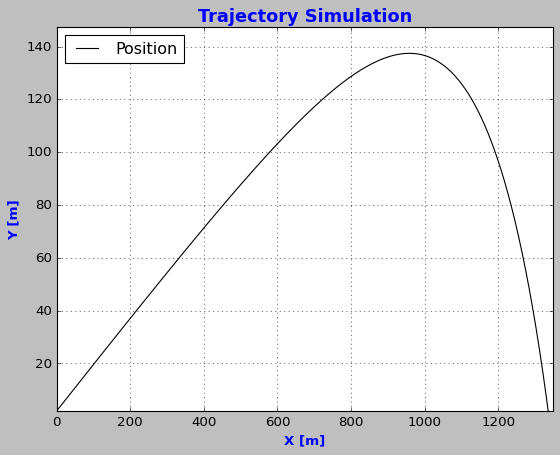

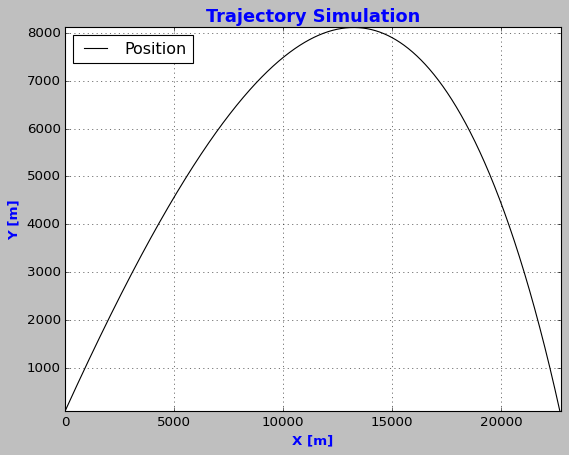

In [521]:
# Examples
a = Projectile(h= 2, m= 0.02, beta= 5e-05, v0 = 1200, theta= 10)
b = Projectile(h= 100, m= 60, beta= 0.0025, v0 = 750, theta= 45)
a.solve()
b.solve()